In [82]:
from monte_carlo_learning.monte_carlo_tic_tac_2 import MonteCarloAgent

In [83]:
import seaborn as sns

f

In [84]:
import pickle as pkl
import pandas as pd 

In [85]:
from pathlib import Path

In [86]:

top_path =  Path( "./runs/games-5005000_learning_rate-0.001_01-03-2024_04-13-41/")

In [87]:
with open(r".//runs//games-800400_learning_rate-0.01_05-05-2024_01-58-34////reduced decay rate and lower bounds for LR_min_0_01_latest_overall_results_800400_lr_0.95.pkl","rb") as f:
    raw_test_data = pkl.load(f)

In [88]:
with open(r".//runs//games-800400_learning_rate-0.01_05-05-2024_01-58-34////reduced decay rate and lower bounds for LR_min_0_01_Combination_super_carlo_800400_lr_0.95.pkl","rb") as f:
    mc_model = pkl.load(f)

In [89]:
mc_model.q_values

{(0, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.9952689279142627,
  1: 0.9470733349822917,
  2: 0.9085472873374631,
  3: 0.9944258286072957,
  4: 0.9945218312153795,
  5: 0.9958357096235613,
  6: 0.9983345439498194,
  7: 0.826674705947242,
  8: 0.9210040605389443},
 (1, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.9993224932249323,
  1: 0.9884953810567293,
  2: 0.9999999980783535,
  3: 0.9970231619975106,
  4: 0.9926924333152152,
  5: 0.9968140183193949,
  6: 0.9981302535416324,
  7: 0.999814682916535},
 (2, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.0},
 (0, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.9999432218899331,
  1: 0.9999421072783794,
  2: 0.8004404338926783,
  3: 0.9393032584722066,
  4: 0.9986657179602201,
  5: 0.9999994176724601,
  6: 0.9999995071281303,
  7: 0.8628090662268563},
 (1, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0},
 (2, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.6627064298413387,
  1: 0.8949900677735981

In [90]:
q_val_df = pd.DataFrame(mc_model.q_values.values())


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>]], dtype=object)

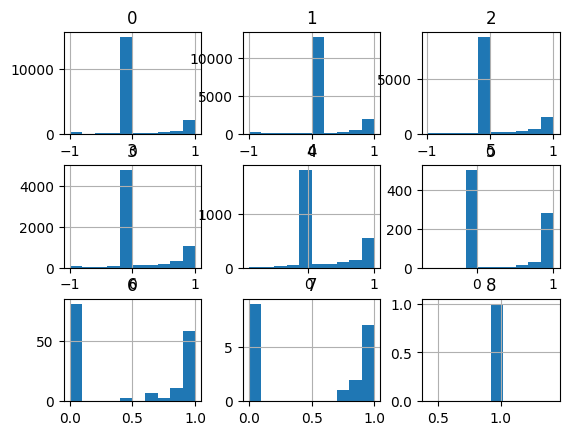

In [91]:
q_val_df.hist()

In [92]:
q_val_df.iloc[:,8].isna().sum()

19682

In [93]:
list_lengths = [len(x) for x in mc_model.q_values.values()]

In [94]:
ll_df = pd.DataFrame(list_lengths,columns=["length"])

In [95]:
ll_df[ll_df["length"]!=9]

,length
1,8
2,8
3,8
4,7
5,7
...,...
19678,0
19679,0
19680,1
19681,0


array([[<Axes: title={'center': 'length'}>]], dtype=object)

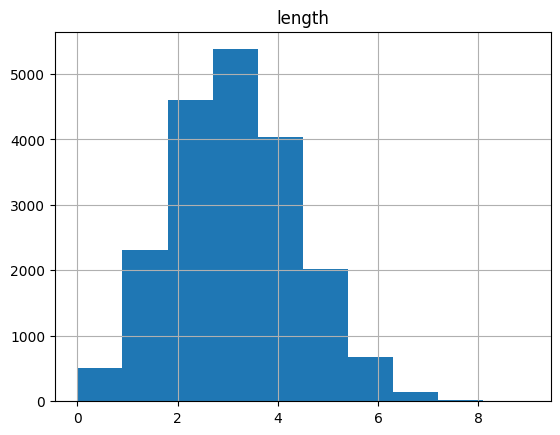

In [96]:
ll_df.hist()

In [97]:
q_val_df[q_val_df.isna().sum(axis=1)==0]

,0,1,2,3,4,5,6,7,8
0,0.995269,0.947073,0.908547,0.994426,0.994522,0.995836,0.998335,0.826675,0.921004


In [98]:
q_val_df[~q_val_df.isna()].sum(axis=0)

0    2222.318736
1    2021.866530
2    1867.748877
3    1248.446767
4     679.960622
5     306.351788
6      73.955497
7       9.321176
8       0.921004
dtype: float64

In [99]:
metrics = pd.DataFrame().from_dict(raw_test_data).T.reset_index(
                                        ).rename(columns={0:"lr",
                                        1: "total wins",
                                        2: "Total Draws",
                                        "index":"games played",
                                        3: "total test games"})

In [100]:
metrics["win_rate"] =  metrics["total wins"] / metrics["total test games"]

<Axes: >

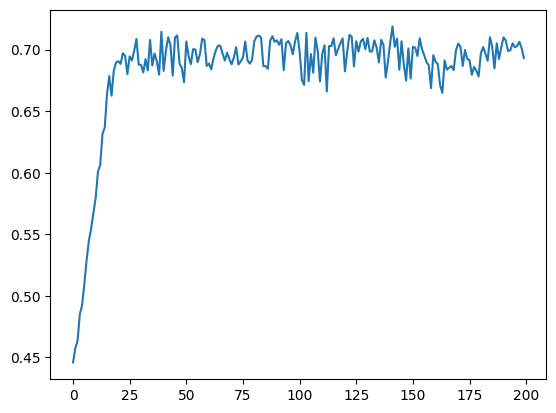

In [101]:
metrics["win_rate"].plot()

<Axes: >

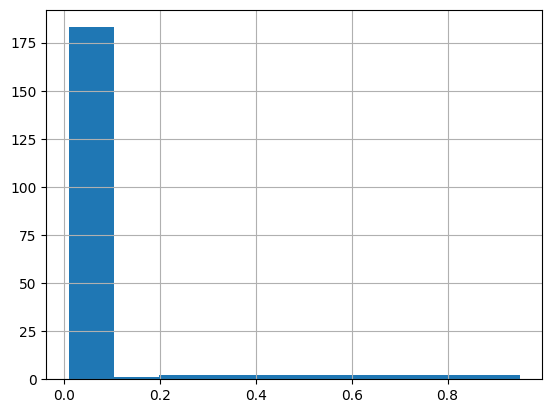

In [102]:
metrics["lr"].hist()

<Axes: >

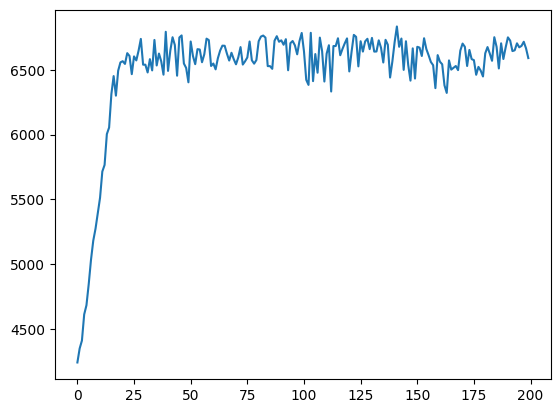

In [103]:
metrics["total wins"].plot()

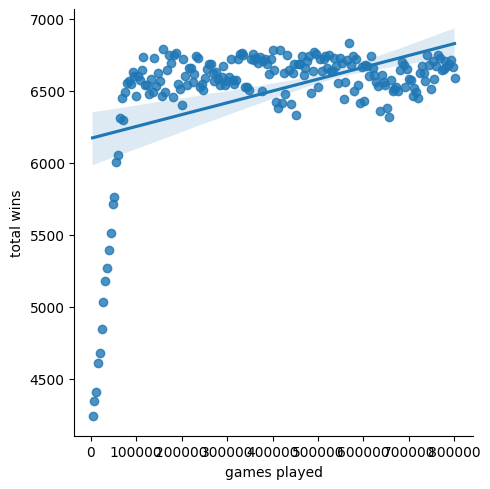

In [104]:
sns.lmplot(x="games played", y="total wins", data=metrics, y_jitter=.03)

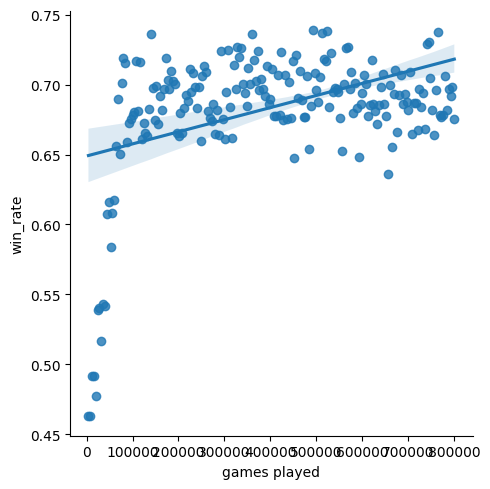

In [105]:


sns.lmplot(x="games played", y="win_rate", data=metrics, y_jitter=.03)

In [106]:
metrics_over100k = metrics[metrics["games played"]>1e5]

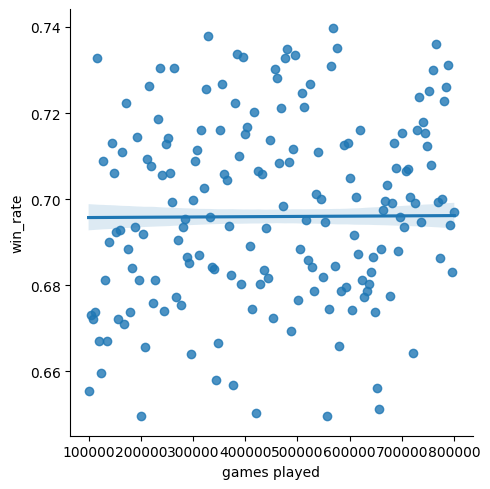

In [107]:


sns.lmplot(x="games played", y="win_rate", data=metrics_over100k, y_jitter=.03)

In [108]:
import numpy as np
total_non_0_all_q_values:int =  0
for key, values  in mc_model.q_values.items():
    #print(sum(values.values()))
    #if sum(values.values()) > 0:
    #    total_non_0_all_q_values +=1
    if not np.any(values.values()):
         total_non_0_all_q_values +=1

In [109]:
total_non_0_all_q_values

512

In [110]:
mc_model.q_values

{(0, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.9952689279142627,
  1: 0.9470733349822917,
  2: 0.9085472873374631,
  3: 0.9944258286072957,
  4: 0.9945218312153795,
  5: 0.9958357096235613,
  6: 0.9983345439498194,
  7: 0.826674705947242,
  8: 0.9210040605389443},
 (1, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.9993224932249323,
  1: 0.9884953810567293,
  2: 0.9999999980783535,
  3: 0.9970231619975106,
  4: 0.9926924333152152,
  5: 0.9968140183193949,
  6: 0.9981302535416324,
  7: 0.999814682916535},
 (2, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.0},
 (0, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.9999432218899331,
  1: 0.9999421072783794,
  2: 0.8004404338926783,
  3: 0.9393032584722066,
  4: 0.9986657179602201,
  5: 0.9999994176724601,
  6: 0.9999995071281303,
  7: 0.8628090662268563},
 (1, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0},
 (2, 1, 0, 0, 0, 0, 0, 0, 0): {0: 0.6627064298413387,
  1: 0.8949900677735981